# ***IBM Capstone Project***


---





This project comprises the analysis of changing technologies and skills which are required currently by recruiters and the technologies which are prefered by the developers. 

## The Data Sets

The analysis is done based on two data sets 

1.   Data set collected using API requests on the provided link by IBM-Coursera.
2.   Modified data set of Stackover flow survey available on IBM cloud.



### Extracting thr data using API and saving it as a CSV file

In [128]:
import requests

In [129]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"

In [130]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    #your code goes here
    response = requests.get(baseurl)
    if response.ok:             
        data = response.json()
    print(data)
    while True:
        for i in data:
            if i.get('A') == technology:
                number_of_jobs = number_of_jobs+1
        if len(data) == 50:
            baseurlp = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json/positions.json?page=1"
            response = requests.get(baseurl)
            if response.ok:             
                    data = response.json()
            continue;
        else:
            break;
    return technology,number_of_jobs

In [131]:
baseurlp = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json/positions.json?page=1"
response = requests.get(baseurl)
if response.ok:             
    datap = response.json()
print(datap)

[{'A': 'technology', 'B': 'number of job posting'}, {'A': 'java', 'B': '92'}, {'A': 'C', 'B': '184'}, {'A': 'C#', 'B': '14'}, {'A': 'C++', 'B': '24'}, {'A': 'Java', 'B': '92'}, {'A': 'JavaScript', 'B': '65'}, {'A': 'Python', 'B': '51'}, {'A': 'Scala', 'B': '47'}, {'A': 'Oracle', 'B': '6'}, {'A': 'SQL Server', 'B': '16'}, {'A': 'MySQL Server', 'B': '5'}, {'A': 'PostgreSQL', 'B': '17'}, {'A': 'MongoDB', 'B': '4'}]


In [38]:
print(get_number_of_jobs('C++'))

[{'A': 'technology', 'B': 'number of job posting'}, {'A': 'java', 'B': '92'}, {'A': 'C', 'B': '184'}, {'A': 'C#', 'B': '14'}, {'A': 'C++', 'B': '24'}, {'A': 'Java', 'B': '92'}, {'A': 'JavaScript', 'B': '65'}, {'A': 'Python', 'B': '51'}, {'A': 'Scala', 'B': '47'}, {'A': 'Oracle', 'B': '6'}, {'A': 'SQL Server', 'B': '16'}, {'A': 'MySQL Server', 'B': '5'}, {'A': 'PostgreSQL', 'B': '17'}, {'A': 'MongoDB', 'B': '4'}]
('C++', 1)


In [39]:
import openpyxl
from openpyxl import Workbook
wb=Workbook()
ws=wb.active
count  = 0
response = requests.get(baseurl)
if response.ok:             
       datap = response.json()
ws.append(['Sl.No.','Skill','Count'])
for i in datap[1:-1]:
    j = i.get('A')
    for a in datap[1:-1]:
        if a.get('A') == j:
                b = a.get('B')
                count = count+1
                ws.append([count,j,b])
wb.save("github-job-postings.xlsx")

In [40]:
import pandas as pd
jobs = pd.read_excel('/content/github-job-postings.xlsx')

In [41]:
jobs

,Sl.No.,Skill,Count
0,1,java,92
1,2,C,184
2,3,C#,14
3,4,C++,24
4,5,Java,92
5,6,JavaScript,65
6,7,Python,51
7,8,Scala,47
8,9,Oracle,6
9,10,SQL Server,16


The Technologies and the respective number of job posting is saved as a CSV file.

## Loading the Survey Data set to a DataFrame

In [132]:
import pandas as pd

In [133]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [134]:
df=pd.read_csv(dataset_url)
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

The data set consists of 11552 rows and 85 columns

# Exploring the data set

In [45]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

In [46]:
print(len(df.index))

11552


In [47]:
print(len(df.columns))

85


In [48]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

These are the fields which are available from the survey data set. 

## **Data wrangling - Cleaning the data set**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

Finding duplicates

In [50]:
len(df[df["Respondent"].duplicated()])

154

we have 154 duplicate row lets remove them to get a quality analysis.

Removing duplicates

In [51]:
df.drop_duplicates(inplace= True)
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

Finding Missing values



In [52]:
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


Find out how many rows are missing in the column 'WorkLoc'

In [53]:
df.WorkLoc.isnull().sum()

32

Imputing missing values

In [54]:
df.WorkLoc.value_counts().sum()

11366

In [55]:
df.WorkLoc.fillna('Office',inplace = True)

In [56]:
df.WorkLoc.isnull().sum()

0

Now we have a Clean data set without null values.

# Normalizing data

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

A new column called 'NormalizedAnnualCompensation' is created which contains the 'Annual Compensation' irrespective of the 'CompFreq' which makes the comparison of salaries easy.

In [57]:
df.CompFreq.value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

In [58]:
import numpy as np
df['NormalizedAnnualCompensation'] = np.where(df['CompFreq'] == 'Yearly',df['CompTotal'],np.where(df['CompFreq'] == 'Monthly',df['CompTotal']*12,np.where(df['CompFreq'] == 'Weekly',df['CompTotal']*52,0)))

In [59]:
Normalized =df[['CompFreq','CompTotal','NormalizedAnnualCompensation']]
Normalized.query('CompFreq == "Monthly"')
Normalized.NormalizedAnnualCompensation.median()

98000.0

In [60]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White

In [61]:
df['Country'].isnull().sum()

0

In [62]:
df.shape

(11398, 86)

Now we have a NormalizedAnnualCompensation column to be used for further analysis.

# Data visvalisation

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics

Loading the clean dataset from IBM Cloud

In [135]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

Distribution Plot for the column ConvertedComp.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


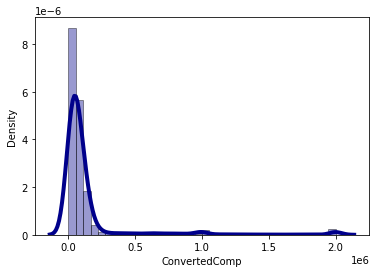

In [65]:
mean = df['ConvertedComp'].mean()
sd = df['ConvertedComp'].std()
#x_axis = df['ConvertedComp']
x_axis = df['ConvertedComp'].dropna()
#plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
#plt.show()
sns.distplot(df['ConvertedComp'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

From the distribution plot we can clearly see that most of the respondent's compensation is below 500000. 

Histogram for the column ConvertedComp.

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <a list of 10 Patch objects>)

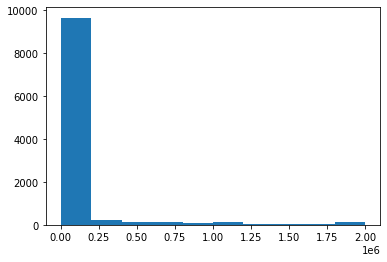

In [66]:
plt.hist(df['ConvertedComp'])

From on histogram on Converted column 86% of the respondent's compensation is around 150000   

In [67]:
df['ConvertedComp'].median()

57745.0

In [68]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [69]:
df.groupby(['Gender'])['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

In [70]:
df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <a list of 10 Patch objects>)

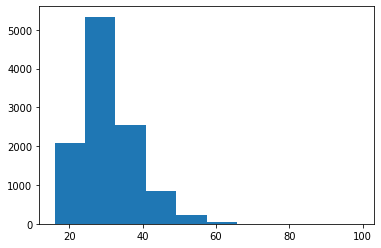

In [71]:
plt.hist(df['Age'])

From the histogram most of the respondents age is 30 to 35


# Outliers

# Finding outliers


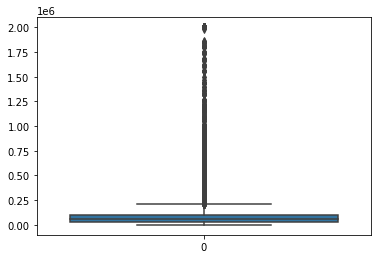

In [72]:
sns.boxplot(data = df['ConvertedComp'])

In [73]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

based on the formula Q3 + 1.5*IQR, values above 209638 are onsidered as outliers

Lets check the number of outliers.

In [74]:
df[df['ConvertedComp']>209638].shape

(879, 85)

we have 879 outliers in over data set. lets filter them 

In [75]:
df = df[df['ConvertedComp']<209638]
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

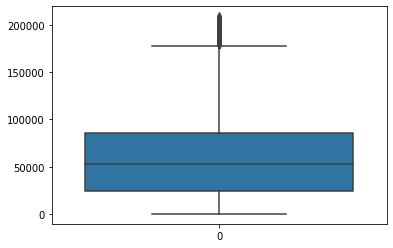

In [76]:
sns.boxplot(data = df['ConvertedComp'])

# Correlation

In [77]:
corr=df.corr().Age
corr

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

# Performing analysis on a RDBMS using SQL quries.

Connecting to the database.

In [78]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-08-30 15:11:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  19.8MB/s    in 1.8s    

2021-08-30 15:11:28 (19.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [79]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

Checking number of rows

In [80]:
QUERY = """
SELECT COUNT(*)
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


List of Tables available

In [81]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Number of Respondents in each Developer type. 

In [82]:
QUERY = """
SELECT count('Respondent') as Count,DevType FROM DevType
Group by DevType 
Order by Count
"""
df=pd.read_sql_query(QUERY,conn)
df

,Count,DevType
0,61,Marketing or sales professional
1,160,Senior executive/VP
2,354,Scientist
3,386,Engineering manager
4,449,"Engineer, site reliability"
5,472,"Developer, game or graphics"
6,480,Product manager
7,514,Educator
8,556,Academic researcher
9,766,Student


Count of languages which are deired by the respondents to learn next year.

In [83]:
QUERY = """
SELECT count('Respondent') as Count,LanguageDesireNextYear FROM LanguageDesireNextYear
Group by LanguageDesireNextYear 
Order by Count
"""
df=pd.read_sql_query(QUERY,conn)
df

,Count,LanguageDesireNextYear
0,149,VBA
1,310,Erlang
2,310,Objective-C
3,336,Assembly
4,413,Clojure
5,610,Dart
6,620,Elixir
7,621,F#
8,836,Other(s):
9,850,R


Number of Respondents in each age.

In [84]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


Describing a table

In [85]:
table_name = 'master' 

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution data using SQL Queries.


Histogram on ConvertedComp column.

In [86]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <a list of 10 Patch objects>)

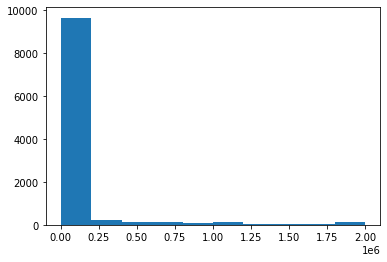

In [87]:
plt.hist(df['ConvertedComp'])

Boxplot on Age column.

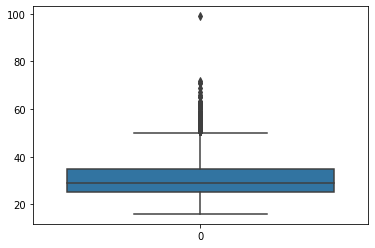

In [88]:
QUERY = """
SELECT Age
FROM master
"""
import seaborn as sns
df = pd.read_sql_query(QUERY,conn)
sns.boxplot(data = df['Age'])

Scatter plot between Age and WorkWeekHrs

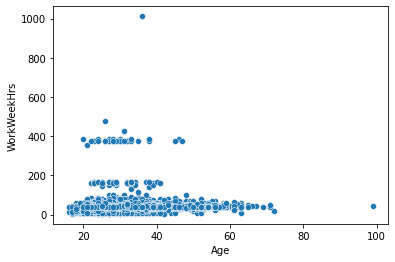

In [89]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
import seaborn as sns
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(x = df['Age'],y = df['WorkWeekHrs'] )

Scatter plot between WorkWeekHrs and CodeRevHrs

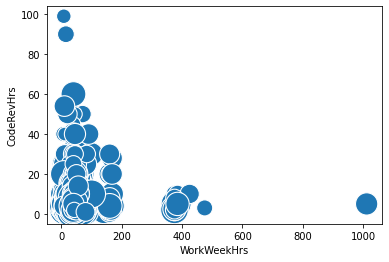

In [90]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
import seaborn as sns
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(x = df['WorkWeekHrs'],y = df['CodeRevHrs'], size = df['Age'], legend=False, sizes=(20, 2000) )

### Visualizing composition of data using SQL queries.


In [91]:
df2 = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)

In [92]:
df2.columns

Index(['Respondent', 'DatabaseWorkedWith'], dtype='object')

In [93]:
df2

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [94]:
df2.groupby("Respondent").count()

,DatabaseWorkedWith
Respondent,
4,2
9,3
13,4
16,3
17,2
...,...
25136,1
25137,1
25138,1


In [95]:
df2[df2["DatabaseWorkedWith"].str.contains("SQL")]

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
3,9,PostgreSQL
4,9,SQLite
8,13,MySQL
...,...,...
31369,25136,Microsoft SQL Server
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server


In [96]:
df2[df2["DatabaseWorkedWith"].str.contains("MySQL")]

,Respondent,DatabaseWorkedWith
0,4,MySQL
8,13,MySQL
11,16,MySQL
17,19,MySQL
24,22,MySQL
...,...,...
31336,25111,MySQL
31342,25120,MySQL
31356,25124,MySQL
31366,25134,MySQL


In [97]:
df2.groupby("DatabaseWorkedWith").count()

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [98]:
y = pd.DataFrame(df2.groupby("DatabaseWorkedWith").count())

In [99]:
y

,Respondent
DatabaseWorkedWith,
Cassandra,397
Couchbase,250
DynamoDB,831
Elasticsearch,1954
Firebase,1314
MariaDB,1709
Microsoft SQL Server,4110
MongoDB,3016
MySQL,5469


In [100]:
y.sort_values(by="Respondent", ascending=False)

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [101]:
y = y.nlargest(5,"Respondent")

In [102]:
y

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


Pie chart on Database worked by the Respondents

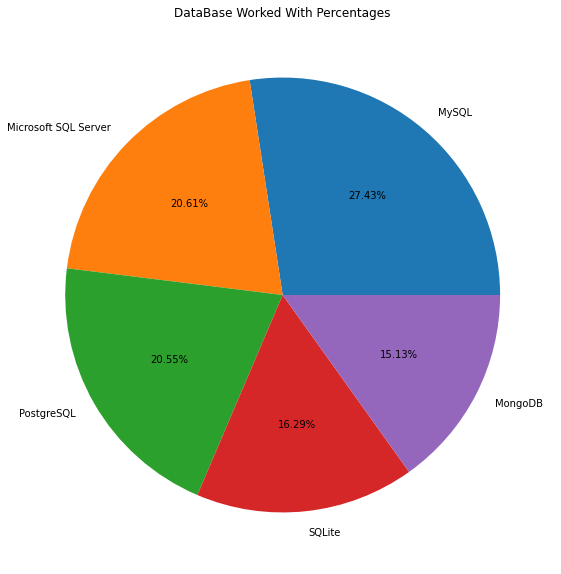

In [103]:
plt.figure(figsize=(10,10))
plt.pie(y.Respondent, labels=['MySQL','Microsoft SQL Server','PostgreSQL','SQLite','MongoDB'],
       autopct='%.2f%%')
plt.title("DataBase Worked With Percentages")
plt.show()

In [104]:
df3 = pd.read_sql("SELECT * FROM DatabaseDesireNextYear", conn)

In [105]:
df3

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [106]:
df3.groupby("DatabaseDesireNextYear").count()

,Respondent
DatabaseDesireNextYear,
Cassandra,1003
Couchbase,390
DynamoDB,1044
Elasticsearch,2856
Firebase,1650
MariaDB,1385
Microsoft SQL Server,2706
MongoDB,3649
MySQL,3281


In [107]:
top5desire = pd.DataFrame(df3.groupby("DatabaseDesireNextYear").count())

In [108]:
top5desire = top5desire.nlargest(5,"Respondent")

Pie chart on Database desired to learn by the Respondents

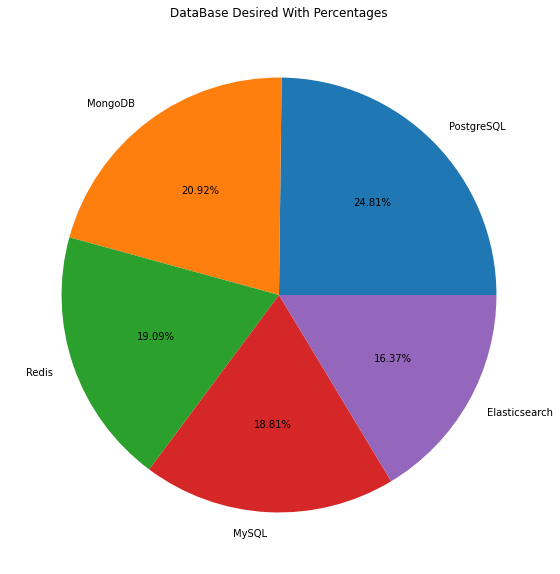

In [109]:
plt.figure(figsize=(10,10))
plt.pie(top5desire.Respondent, labels=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch'],
       autopct='%.2f%%')
plt.title("DataBase Desired With Percentages")
plt.show()

In [110]:
df4 = pd.read_sql("SELECT * FROM LanguageDesireNextYear", conn)

In [111]:
df4

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [112]:
df4.groupby("LanguageDesireNextYear").count()

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [113]:
top5langdesired = pd.DataFrame(df4.groupby("LanguageDesireNextYear").count())

In [114]:
top5langdesired

,Respondent
LanguageDesireNextYear,
Assembly,336
Bash/Shell/PowerShell,3097
C,1028
C#,3591
C++,1633
Clojure,413
Dart,610
Elixir,620
Erlang,310


In [115]:
top5langdesired = top5langdesired.nlargest(5,"Respondent")
top5langdesired

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


Pie chart on Languages Desired to learn next year by the Respondents

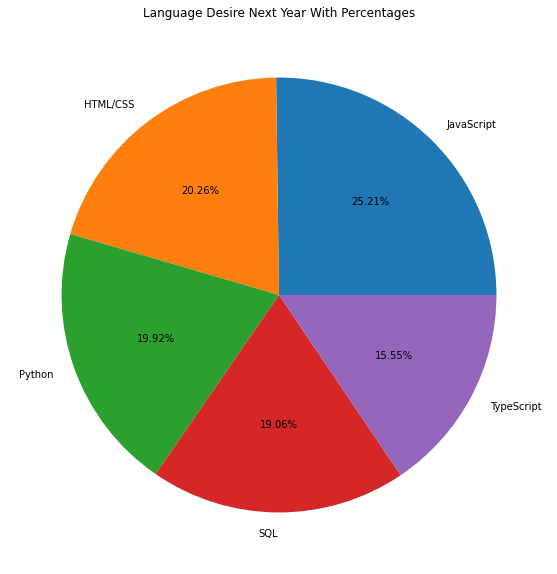

In [116]:
plt.figure(figsize=(10,10))
plt.pie(top5langdesired.Respondent, labels=['JavaScript','HTML/CSS','Python','SQL','TypeScript'],
       autopct='%.2f%%')
plt.title("Language Desire Next Year With Percentages")
plt.show()

# Stacked Charts


Stacked chart between WorkWeekHrs and CodeRevHrs.


In [125]:
df.WorkWeekHrs.median()

40.0

In [126]:
df.CodeRevHrs.median()

4.0

In [127]:
age = df[(df["Age"] >= 30.0) & (df["Age"] <= 35.0)]

In [120]:
age

,Age,WorkWeekHrs,CodeRevHrs
5,31.0,8.0,3.0
11,34.0,40.0,2.0
12,32.0,40.0,2.0
18,34.0,42.0,15.0
22,33.0,40.0,2.0
...,...,...,...
11385,32.0,42.0,4.0
11391,32.0,50.0,2.0
11392,32.0,56.0,14.0
11395,34.0,40.0,5.0


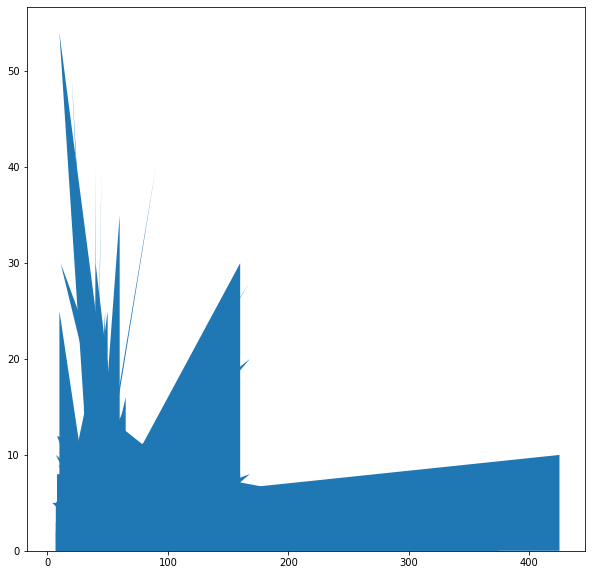

In [121]:
plt.figure(figsize=(10,10))
plt.stackplot(age.WorkWeekHrs, age.CodeRevHrs)
plt.show()

# Line Chart


The median ConvertedComp for all ages from 45 to 60.

In [136]:
age2 = df[(df["Age"] >= 45.0) & (df["Age"] <= 60.0)]

In [137]:
age2.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,Taken an online course in programming or softw...,"10,000 or more employees","Data or business analyst;Designer;Developer, b...",35,12,18,Slightly satisfied,Very dissatisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",More than 4 years ago,Interview with people in senior / management r...,No,Industry that I'd be working in;Financial perf...,I had a negative experience or interaction at ...,USD,United States dollar,103000.0,Yearly,103000.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,"Less than half the time, but at least one day ...",Home,Average,No,NaN,...,Elasticsearch;MySQL;Oracle;Redis,Elasticsearch;MySQL;Oracle;Redis,Docker;Linux;Raspberry Pi;Windows,Docker;Linux;Raspberry Pi;Windows,Angular/Angular.js;Ruby on Rails,Angular/Angular.js;Ruby on Rails,Node.js,Node.js,Sublime Text;Visual Studio;Visual Studio Code,Windows,"Outside of work, for personal projects",Not at all,NaN,Yes,Yes,Yes,Instagram,Online,Username,I don't remember,Daily or almost daily,Find answers to specific questions,3-5 times per week,Stack Overflow was much faster,0-10 minutes,Yes,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees","Data or business analyst;Developer, back-end;D...",41,12,35,Very satisfied,Slightly satisfied,Very confident,No,No,"I’m not actively looking, but I am open to new...",More than 4 years ago,Interview with people in senior / management r...,No,Office environment or company culture;Remote w...,I was preparing for a job search,USD,United States dollar,NaN,NaN,NaN,NaN,There's no schedule or spec; I work on what se...,Distracting work environment;Meetings,A few days each month,Home,A little above average,No,NaN,...,Microsoft SQL Server;Oracle,Microsoft SQL Server;Oracle,Arduino;Windows,Android;Windows,ASP.NET;jQuery,Angular/Angular.js;ASP.NET;jQuery,.NET,.NET;.NET Core;Xamarin,Visual Studio,Windows,I do not use containers,Not at all,An irresponsible use of resources,No,Yes,What?,Twitter,In real life (in person),Username,I don't remember,Multiple times per day,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcom

In [138]:
age2.ConvertedComp

7        103000.0
50            NaN
66        54996.0
75        62807.0
93        72522.0
           ...   
11342     76339.0
11345     68705.0
11350    300000.0
11372     87668.0
11373     59652.0
Name: ConvertedComp, Length: 599, dtype: float64

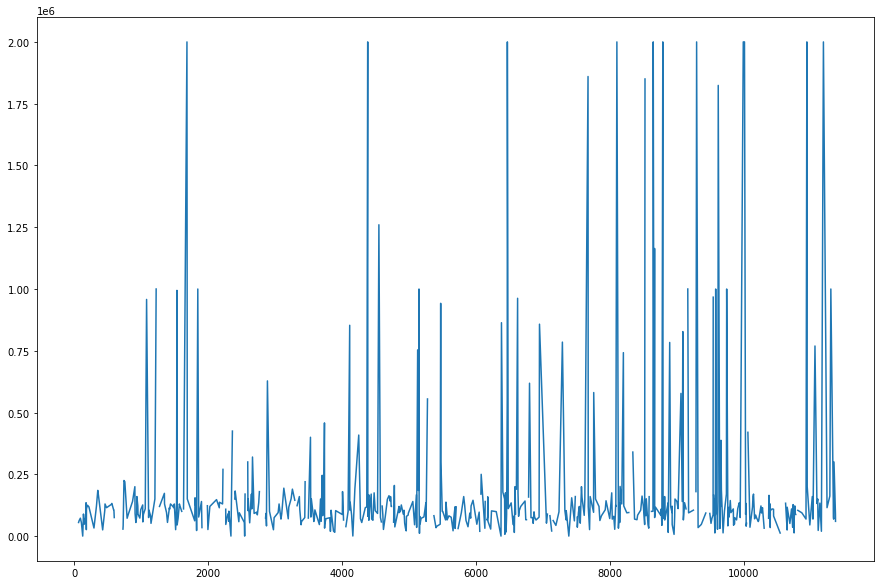

In [139]:
age2.ConvertedComp.plot(figsize=(15,10))
plt.show()

 Line Chart of Age and median ConvertedComp for the age group 25-30 and their correlation.

In [140]:
age3 = df[(df["Age"] >= 25.0) & (df["Age"] <= 30.0)]

In [141]:
age3.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;Interview with pe...,Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Node.js;Xamarin,Node.js;TensorFlow,Vim;Visual Studio;Visual Studio Code;Xcode,Windows,Development;Testing;Production,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,Yes,Yes,Twitter,In real life (in person),Username,2011,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",10,17,3,Very satisfied,Slightly satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",3-4 years ago,Interview with people in senior / management r...,Yes,"Languages, frameworks, and other technologies ...",I heard about a job opportunity (from a recrui...,GBP,Pound sterling,29000.0,Monthly,455352.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,A few days each month,Home,Average,No,NaN,...,MongoDB;Microsoft SQL Server;MySQL,Elasticsearch;MongoDB;Microsoft SQL Server;SQLite,NaN,AWS;Google Cloud Platform;Microsoft Azure,Angular/Angular.js;ASP.NET;jQuery,Angular/Angular.js;ASP.NET;React.js,.NET;.NET Core;Node.js,.NET Core;Node.js;React Native,Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,A passing fad,No,SIGH,No,YouTube,Online,Username,2010,Multiple times per day,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was much faster,11-30

In [142]:
age3.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.006331,-0.009882,-0.020475,0.009548,-0.032112
CompTotal,-0.006331,1.000000,-0.038309,0.005882,0.059431,0.009860
ConvertedComp,-0.009882,-0.038309,1.000000,0.013116,-0.047305,0.062748
WorkWeekHrs,-0.020475,0.005882,0.013116,1.000000,0.009821,0.023527
CodeRevHrs,0.009548,0.059431,-0.047305,0.009821,1.000000,-0.003597
Age,-0.032112,0.009860,0.062748,0.023527,-0.003597,1.000000


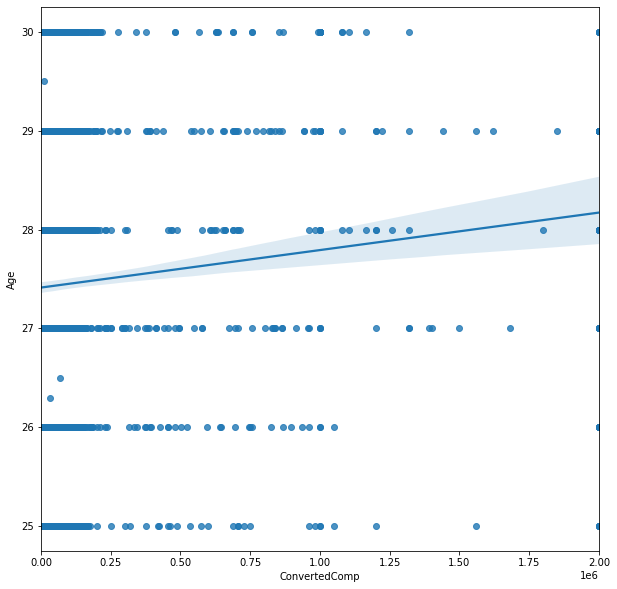

In [143]:
plt.figure(figsize=(10,10))
sns.regplot(x=age3.ConvertedComp,y=age3.Age)
plt.show()

# Bar Chart


Bar chart for visualisiing MainBranch of the Respodents.

In [144]:
df.MainBranch.value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

In [145]:
z = pd.DataFrame(df.MainBranch.value_counts())

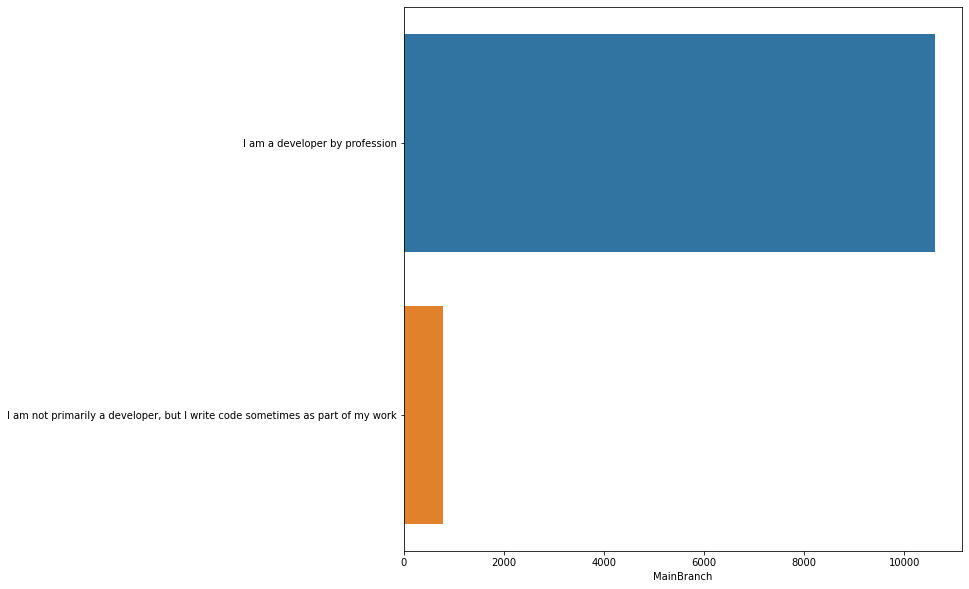

In [146]:
plt.figure(figsize=(10,10))
sns.barplot(x=z.MainBranch,y=z.index, orient='h')
plt.show()

Types of Developers.


In [147]:
df5 = pd.read_sql("SELECT * FROM DevType", conn)

In [148]:
df5

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


Number of Full-stac developers.

In [149]:
df5[df5["DevType"].str.contains("full-stack", regex=False)]

,Respondent,DevType
0,4,"Developer, full-stack"
4,9,"Developer, full-stack"
12,13,"Developer, full-stack"
20,16,"Developer, full-stack"
23,17,"Developer, full-stack"
...,...,...
35261,25122,"Developer, full-stack"
35269,25133,"Developer, full-stack"
35279,25134,"Developer, full-stack"
35292,25136,"Developer, full-stack"


Number of Back-end Developers.

In [150]:
df5[df5["DevType"].str.contains("back-end")]

,Respondent,DevType
2,9,"Developer, back-end"
9,13,"Developer, back-end"
21,17,"Developer, back-end"
28,20,"Developer, back-end"
36,22,"Developer, back-end"
...,...,...
35276,25134,"Developer, back-end"
35289,25136,"Developer, back-end"
35296,25137,"Developer, back-end"
35298,25138,"Developer, back-end"


Number of Front-end Developers.

In [151]:
df5[df5["DevType"].str.contains("front-end")]

,Respondent,DevType
3,9,"Developer, front-end"
11,13,"Developer, front-end"
22,17,"Developer, front-end"
30,20,"Developer, front-end"
38,22,"Developer, front-end"
...,...,...
35256,25120,"Developer, front-end"
35262,25123,"Developer, front-end"
35278,25134,"Developer, front-end"
35291,25136,"Developer, front-end"


Number of Mobole Developers.

In [154]:
df5[df5["DevType"].str.contains("Developer, mobile")]

,Respondent,DevType
13,13,"Developer, mobile"
32,20,"Developer, mobile"
54,26,"Developer, mobile"
72,43,"Developer, mobile"
104,61,"Developer, mobile"
...,...,...
35253,25118,"Developer, mobile"
35263,25124,"Developer, mobile"
35265,25128,"Developer, mobile"
35280,25134,"Developer, mobile"


Closing connection with the Database.

In [153]:
conn.close()



---


